In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
import matplotlib.pyplot as plt


In [8]:
df = pd.read_csv('data_limpieza.csv')
df = df.head(50000)

In [9]:
# Variable de respuesta (última columna)
y = df['PUNT_GLOBAL']

# Variables de entrada (solo las columnas especificadas)
columnas_X = ['PERIODO', 'COLE_AREA_UBICACION', 'COLE_BILINGUE', 'COLE_CALENDARIO',
       'COLE_CARACTER', 'COLE_DEPTO_UBICACION', 'COLE_GENERO', 'COLE_JORNADA',
       'COLE_MCPIO_UBICACION', 'COLE_NATURALEZA',
       'COLE_NOMBRE_ESTABLECIMIENTO', 'COLE_NOMBRE_SEDE', 'ESTU_GENERO',
       'ESTU_PRIVADO_LIBERTAD', 'FAMI_CUARTOSHOGAR', 'FAMI_EDUCACIONMADRE',
       'FAMI_EDUCACIONPADRE', 'FAMI_ESTRATOVIVIENDA', 'FAMI_PERSONASHOGAR',
       'FAMI_TIENEAUTOMOVIL', 'FAMI_TIENECOMPUTADOR', 'FAMI_TIENEINTERNET',
       'FAMI_TIENELAVADORA', 'DESEMP_INGLES', 'PUNT_INGLES',
       'PUNT_MATEMATICAS', 'PUNT_SOCIALES_CIUDADANAS', 'PUNT_C_NATURALES',
       'PUNT_LECTURA_CRITICA']

X= df[columnas_X]
X

,PERIODO,COLE_AREA_UBICACION,COLE_BILINGUE,COLE_CALENDARIO,COLE_CARACTER,COLE_DEPTO_UBICACION,COLE_GENERO,COLE_JORNADA,COLE_MCPIO_UBICACION,COLE_NATURALEZA,...,FAMI_TIENEAUTOMOVIL,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET,FAMI_TIENELAVADORA,DESEMP_INGLES,PUNT_INGLES,PUNT_MATEMATICAS,PUNT_SOCIALES_CIUDADANAS,PUNT_C_NATURALES,PUNT_LECTURA_CRITICA
0,20192,URBANO,N,A,TÉCNICO/ACADÉMICO,SANTANDER,MIXTO,MAÑANA,BUCARAMANGA,OFICIAL,...,No,Si,Si,Si,A2,61.0,64,49,59,63
1,20192,URBANO,N,A,TÉCNICO/ACADÉMICO,SANTANDER,MIXTO,MAÑANA,BUCARAMANGA,OFICIAL,...,No,Si,Si,Si,A2,61.0,64,49,59,63
2,20192,RURAL,N,A,ACADÉMICO,SANTANDER,MIXTO,MAÑANA,CHARALÁ,OFICIAL,...,No,No,No,Si,A1,54.0,69,55,48,57
3,20192,RURAL,N,A,ACADÉMICO,SANTANDER,MIXTO,MAÑANA,CHARALÁ,OFICIAL,...,No,No,No,Si,A1,54.0,69,55,48,57
4,20192,URBANO,N,A,TÉCNICO,NORTE SANTANDER,MIXTO,ÚNICA,VILLA DEL ROSARIO,OFICIAL,...,Si,Si,Si,Si,A-,37.0,45,50,51,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,20192,URBANO,N,A,ACADÉMICO,SANTANDER,MIXTO,MAÑANA,BUCARAMANGA,OFICIAL,...,No,Si,Si,Si,A1,55.0,51,48,47,55
49996,20192,URBANO,N,A,ACADÉMICO,SANTANDER,MIXTO,MAÑANA,BUCARAMANGA,OFICIAL,...,No,Si,Si,Si,A1,55.0,51,48,47,55
49997,20192,URBANO,N,A,ACADÉMICO,SANTANDER,MIXTO,MAÑANA,FLORIDABLANCA,NO OFICIAL,...,Si,Si,Si,Si,B+,81.0,76,75,73,78
49998,20192,URBANO,N,A,ACADÉMICO,SANTANDER,MIXTO,MAÑANA,FLORIDABLANCA,NO OFICIAL,...,Si,Si,Si,Si,B+,81.0,76,75,73,78


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import tensorflow as tf
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Suponiendo que tienes tu DataFrame 'df' cargado
# Cargar los datos

# Definir rangos de puntajes y crear etiquetas de clasificación
bins = [0, 250, 350, float('inf')]
labels = [0, 1, 2]  # 0: Bajo, 1: Medio, 2: Alto
df['PUNT_GLOBAL_BIN'] = pd.cut(df['PUNT_GLOBAL'], bins=bins, labels=labels, right=False)

# Variables de entrada (todas menos 'PUNT_GLOBAL' y 'PUNT_GLOBAL_BIN')
X = df.drop(columns=['PUNT_GLOBAL', 'PUNT_GLOBAL_BIN'])
# Variable de salida
y = df['PUNT_GLOBAL_BIN']

# Columnas categóricas y numéricas
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()
numeric_columns = X.select_dtypes(include=['number']).columns.tolist()

# Preprocesamiento: OneHotEncoding para variables categóricas, escalado para numéricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_columns)
    ])

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Preprocesar los datos
X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

# Convertir y_train y y_test a números enteros
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Construir el modelo
def build_model(activation, neurons, input_shape):
    tf.random.set_seed(42)
    return tf.keras.Sequential([
        tf.keras.layers.Input(shape=input_shape),
        tf.keras.layers.Dense(neurons, activation=activation, kernel_initializer="he_normal"),
        tf.keras.layers.Dense(neurons // 2, activation=activation, kernel_initializer="he_normal"),
        tf.keras.layers.Dense(3, activation='softmax')  # Cambiar a softmax para clasificación multiclase
    ])

def build_and_train_model(optimizer, activation, neurons):
    input_shape = (X_train.shape[1],)  # Asignar forma de entrada
    model = build_model(activation, neurons, input_shape)
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))
    
    # Predicciones
    y_pred_train = model.predict(X_train).argmax(axis=1)
    y_pred_test = model.predict(X_test).argmax(axis=1)
    
    # Calcular métricas adicionales
    precision = precision_score(y_test, y_pred_test, average='macro')
    recall = recall_score(y_test, y_pred_test, average='macro')
    f1 = f1_score(y_test, y_pred_test, average='macro')
    auc_score = roc_auc_score(y_test, model.predict(X_test), multi_class='ovr')
    
    # Guardar métricas en el historial
    history.history['precision'] = precision
    history.history['recall'] = recall
    history.history['f1_score'] = f1
    history.history['auc'] = auc_score
    
    return history

learning_rate = 0.001

# Lista de optimizadores con learning rate 
optimizadores = {
    'Adagrad': tf.keras.optimizers.Adagrad(learning_rate=learning_rate),
    'Adam': tf.keras.optimizers.Adam(learning_rate=learning_rate),
    'Momentum': tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9),
    'RMSprop': tf.keras.optimizers.RMSprop(learning_rate=learning_rate),
    'Nadam': tf.keras.optimizers.Nadam(learning_rate=learning_rate),
    'Adamax': tf.keras.optimizers.Adamax(learning_rate=learning_rate),
    'Adadelta': tf.keras.optimizers.Adadelta(learning_rate=learning_rate),
    'FTRL': tf.keras.optimizers.Ftrl(learning_rate=learning_rate)
}

# Entrenar el modelo y guardar historiales
histories = {}
for name, optimizer in optimizadores.items():
    histories[name] = build_and_train_model(optimizer, "relu", 64)


Epoch 1/10
1250/1250 [==============================] - 5s 3ms/step - loss: 0.4613 - accuracy: 0.8700 - val_loss: 0.2902 - val_accuracy: 0.9077
Epoch 2/10
1250/1250 [==============================] - 3s 3ms/step - loss: 0.2459 - accuracy: 0.9244 - val_loss: 0.2076 - val_accuracy: 0.9367
Epoch 3/10
1250/1250 [==============================] - 3s 3ms/step - loss: 0.1895 - accuracy: 0.9477 - val_loss: 0.1692 - val_accuracy: 0.9493
Epoch 4/10
1250/1250 [==============================] - 3s 3ms/step - loss: 0.1589 - accuracy: 0.9591 - val_loss: 0.1456 - val_accuracy: 0.9584
Epoch 5/10
1250/1250 [==============================] - 3s 3ms/step - loss: 0.1388 - accuracy: 0.9661 - val_loss: 0.1293 - val_accuracy: 0.9647
Epoch 6/10
1250/1250 [==============================] - 4s 3ms/step - loss: 0.1247 - accuracy: 0.9701 - val_loss: 0.1176 - val_accuracy: 0.9688
Epoch 7/10
1250/1250 [==============================] - 4s 3ms/step - loss: 0.1141 - accuracy: 0.9737 - val_loss: 0.1087 - val_accuracy:

c:\Users\juanm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


313/313 [==============================] - 1s 2ms/step
Epoch 1/10
1250/1250 [==============================] - 6s 3ms/step - loss: 1.0775 - accuracy: 0.5322 - val_loss: 1.0665 - val_accuracy: 0.5331
Epoch 2/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.0594 - accuracy: 0.5324 - val_loss: 1.0529 - val_accuracy: 0.5331
Epoch 3/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.0463 - accuracy: 0.5324 - val_loss: 1.0392 - val_accuracy: 0.5331
Epoch 4/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.0304 - accuracy: 0.5324 - val_loss: 1.0207 - val_accuracy: 0.5331
Epoch 5/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.0096 - accuracy: 0.5324 - val_loss: 0.9976 - val_accuracy: 0.5331
Epoch 6/10
1250/1250 [==============================] - 4s 3ms/step - loss: 0.9817 - accuracy: 0.5324 - val_loss: 0.9599 - val_accuracy: 0.5331
Epoch 7/10
1250/1250 [==============================] - 4s 3ms/step - loss: 0.921

c:\Users\juanm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


313/313 [==============================] - 1s 2ms/step


In [11]:
histories.values()

dict_values([<keras.src.callbacks.History object at 0x0000022D587593D0>, <keras.src.callbacks.History object at 0x0000022D5371BCD0>, <keras.src.callbacks.History object at 0x0000022D54200150>, <keras.src.callbacks.History object at 0x0000022D590EEE10>, <keras.src.callbacks.History object at 0x0000022D5C1D9350>, <keras.src.callbacks.History object at 0x0000022D5C5611D0>, <keras.src.callbacks.History object at 0x0000022D664280D0>, <keras.src.callbacks.History object at 0x0000022D6695E310>])

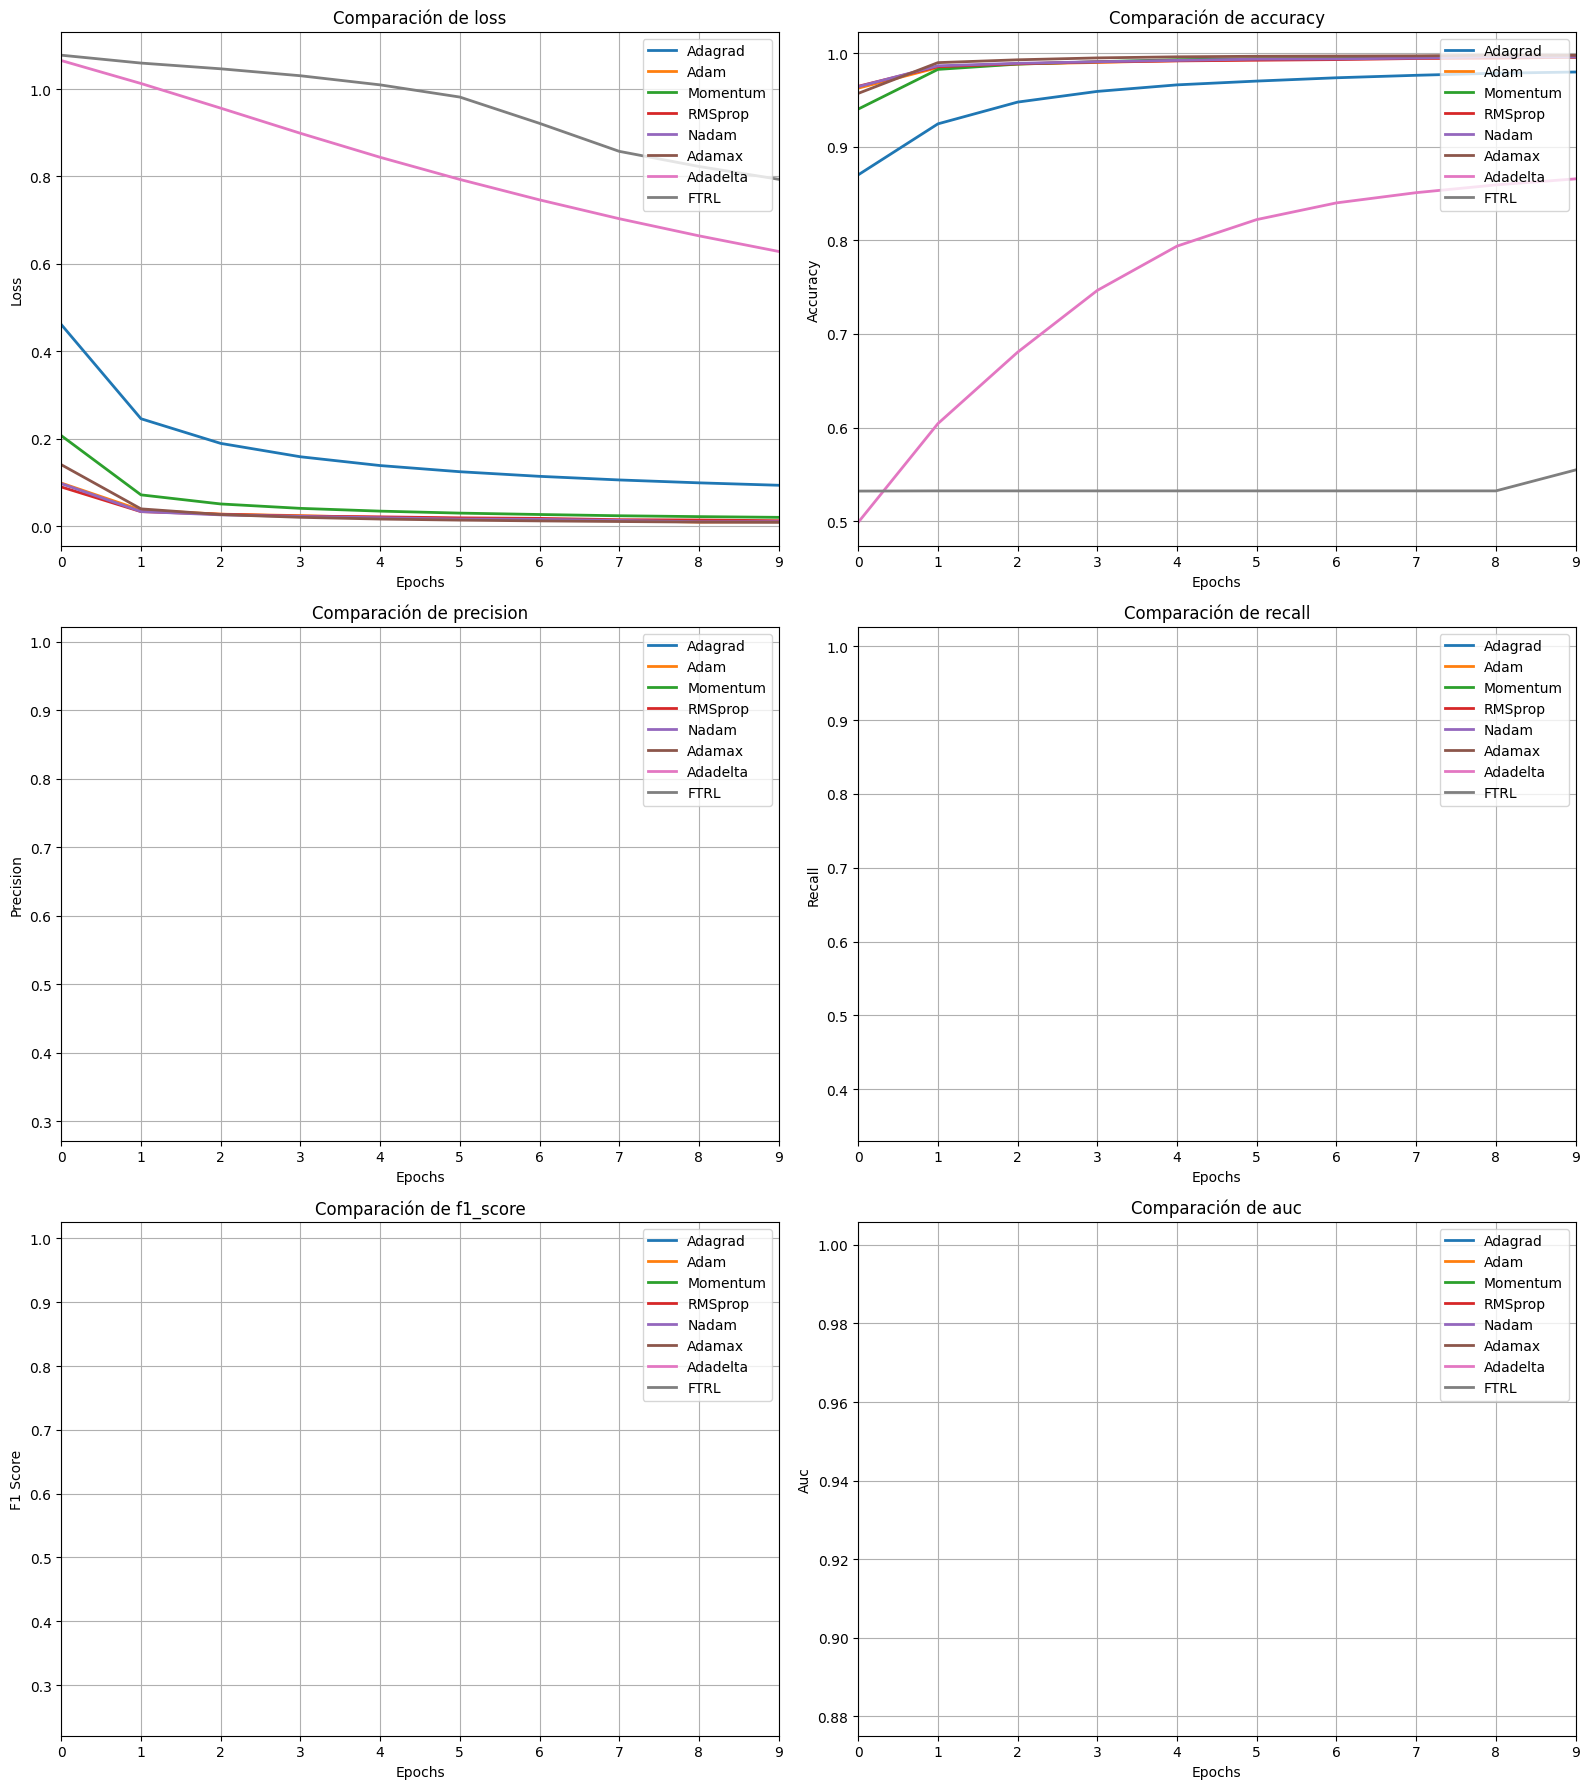

In [12]:
# Crear subplots
fig, axs = plt.subplots(3, 2, figsize=(16, 18))  # 3 filas y 2 columnas para acomodar 6 métricas

# Métricas a graficar
metrics = ["loss", "accuracy", "precision", "recall", "f1_score", "auc"]

# Graficar resultados
for i, metric in enumerate(metrics):
    ax = axs[i // 2, i % 2]
    for name, history in histories.items():
        if metric in history.history:
            ax.plot(history.history[metric], label=f"{name}", linewidth=2)
    ax.grid()
    ax.set_xlabel("Epochs")
    ax.set_ylabel(metric.replace("_", " ").title())
    ax.legend(loc="upper right")
    ax.set_title(f"Comparación de {metric}")
    ax.set_xlim(0, len(history.history['loss']) - 1)

plt.tight_layout()
plt.show()
